In [14]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%run getSeeingSkyBright5Sig.ipynb

In [15]:
def getLocRADec(smap):
    sort = np.sort(smap)[::-1]
    sums = np.cumsum(sort)
    conf = np.where(sums>0.9)[0][0]
    thresh = sort[conf]
    locInd = np.where(smap>thresh)[0]
    nside = hp.npix2nside(smap.size)
    locRADec = hp.pix2ang(nside,locInd)
    locRA = locRADec[1]
    locDec = locRADec[0]-np.pi/2
    return locRA,locDec

In [16]:
def getSeeingFig(filt,smap,mjd,title='',cmlims=['min','max'],cbar=True):
    locRA,locDec = getLocRADec(smap)
    seeing = getSeeing(filt,locRA,locDec,mjd)
    
    f, ax = plt.subplots(subplot_kw={'projection': "mollweide"})
    ax.grid(True,color = '0.4')
    
    goodInd = np.where(np.isnan(seeing)==False)[0]
    badInd = np.where(np.isnan(seeing))[0]

    goodsee = np.array([])
    goodra = np.array([])
    gooddec = np.array([])
    badra = np.array([])
    baddec = np.array([])
    
    goodsee = seeing[goodInd]
    goodra = locRA[goodInd]
    gooddec = locDec[goodInd]
    badra = locRA[badInd]
    baddec = locDec[badInd]
    
    if goodsee.size>0:
        if cmlims[0]=='min':
            lowest = np.min(goodsee)
        else:
             lowest = cmlims[0]
        if cmlims[1]=='max':
            highest = np.max(goodsee)
        else:
             highest = cmlims[1]
    else:
        lowest=None
        highest=None
    
    mw = ax.scatter(goodra-np.pi,gooddec,c=goodsee,cmap='plasma',vmin=lowest,vmax=highest)
    mw2 = ax.scatter(badra-np.pi,baddec,c='k')

    ax.set_xlabel("RA",fontsize=16)
    ax.set_ylabel("Dec",fontsize=16)
    ax.set_title(f"{title}",fontsize=18)
    ax.set_facecolor('#DDF7FF')

    if cbar:
        if goodsee.size>0:
            med = (lowest+highest)/2
            low = (lowest+med)/2
            high = (med+highest)/2

            cb = f.colorbar(mw, ax=ax,orientation='horizontal')
            cb.set_label('Seeing')
            cb.set_ticks([lowest,low,med,high,highest])
            cb.ax.set_xticklabels([f"{lowest:5.3}",f"{low:5.3}",f"{med:5.3}",f"{high:5.3}",f"{highest:5.3}"])

In [17]:
def getSkyBrightFig(filt,smap,mjd,title='',cmlims=['min','max'],cbar=True):
    locRA,locDec = getLocRADec(smap)
    skyBright = getSkyBright(filt,locRA,locDec,mjd)
    
    f, ax = plt.subplots(subplot_kw={'projection': "mollweide"})
    ax.grid(True,color = '0.4')
    
    goodInd = np.where(np.isnan(skyBright)==False)[0]
    badInd = np.where(np.isnan(skyBright))[0]

    goodBright = np.array([])
    goodra = np.array([])
    gooddec = np.array([])
    badra = np.array([])
    baddec = np.array([])
    
    goodBright = skyBright[goodInd]
    goodra = locRA[goodInd]
    gooddec = locDec[goodInd]
    badra = locRA[badInd]
    baddec = locDec[badInd]

    if goodBright.size>0:
        if cmlims[0]=='min':
            lowest = np.min(goodBright)
        else:
             lowest = cmlims[0]
        if cmlims[1]=='max':
            highest = np.max(goodBright)
        else:
             highest = cmlims[1]
    else:
        lowest=None
        highest=None
    
    mw = ax.scatter(goodra-np.pi,gooddec,c=goodBright,cmap='plasma',vmin=lowest,vmax=highest)
    mw2 = ax.scatter(badra-np.pi,baddec,c='k')

    ax.set_xlabel("RA",fontsize=16)
    ax.set_ylabel("Dec",fontsize=16)
    ax.set_title(f"{title}",fontsize=18)
    ax.set_facecolor('#DDF7FF')
    
    if cbar:
        if goodBright.size>0:
            med = (lowest+highest)/2
            low = (lowest+med)/2
            high = (med+highest)/2

            cb = f.colorbar(mw, ax=ax,orientation='horizontal')
            cb.set_label('Sky Brightness (Mag)')
            cb.set_ticks([lowest,low,med,high,highest])
            cb.ax.set_xticklabels([f"{lowest:5.3}",f"{low:5.3}",f"{med:5.3}",f"{high:5.3}",f"{highest:5.3}"])

In [18]:
def getM5Fig(filt,smap,mjd,title='',cmlims=['min','max'],cbar=True):
    locRA,locDec = getLocRADec(smap)
    m5 = get5sig(filt,locRA,locDec,mjd)
    
    f, ax = plt.subplots(subplot_kw={'projection': "mollweide"})
    ax.grid(True,color = '0.4')
    
    goodInd = np.where(np.isnan(m5)==False)[0]
    badInd = np.where(np.isnan(m5))[0]

    goodm5 = np.array([])
    goodra = np.array([])
    gooddec = np.array([])
    badra = np.array([])
    baddec = np.array([])
    
    goodm5 = m5[goodInd]
    goodra = locRA[goodInd]
    gooddec = locDec[goodInd]
    badra = locRA[badInd]
    baddec = locDec[badInd]

    if goodm5.size>0:
        if cmlims[0]=='min':
            lowest = np.min(goodm5)
        else:
             lowest = cmlims[0]
        if cmlims[1]=='max':
            highest = np.max(goodm5)
        else:
             highest = cmlims[1]
    else:
        lowest=None
        highest=None
    
    mw = ax.scatter(goodra-np.pi,gooddec,c=goodm5,cmap='plasma',vmin=lowest,vmax=highest)
    mw2 = ax.scatter(badra-np.pi,baddec,c='k')

    ax.set_xlabel("RA",fontsize=16)
    ax.set_ylabel("Dec",fontsize=16)
    ax.set_title(f"{title}",fontsize=18)
    ax.set_facecolor('#DDF7FF')
    
    if cbar:
        if goodm5.size>0:
            med = (lowest+highest)/2
            low = (lowest+med)/2
            high = (med+highest)/2

            cb = f.colorbar(mw, ax=ax,orientation='horizontal')
            cb.set_label('Five-Sigma Depth (Mag)')
            cb.set_ticks([lowest,low,med,high,highest])
            cb.ax.set_xticklabels([f"{lowest:5.3}",f"{low:5.3}",f"{med:5.3}",f"{high:5.3}",f"{highest:5.3}"])

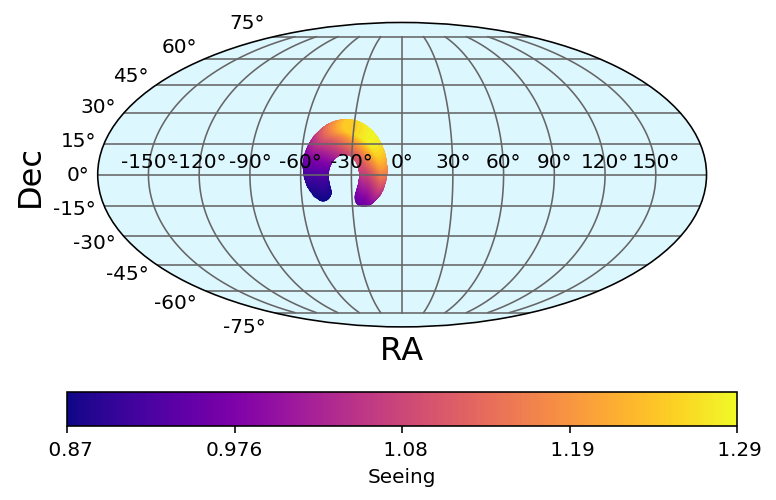

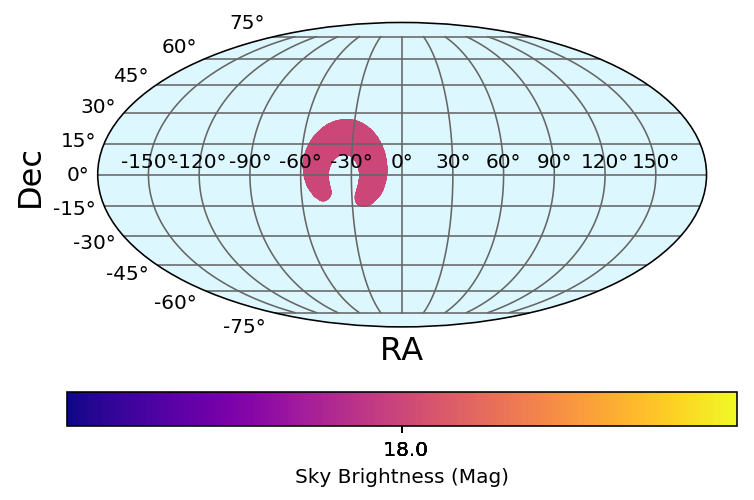

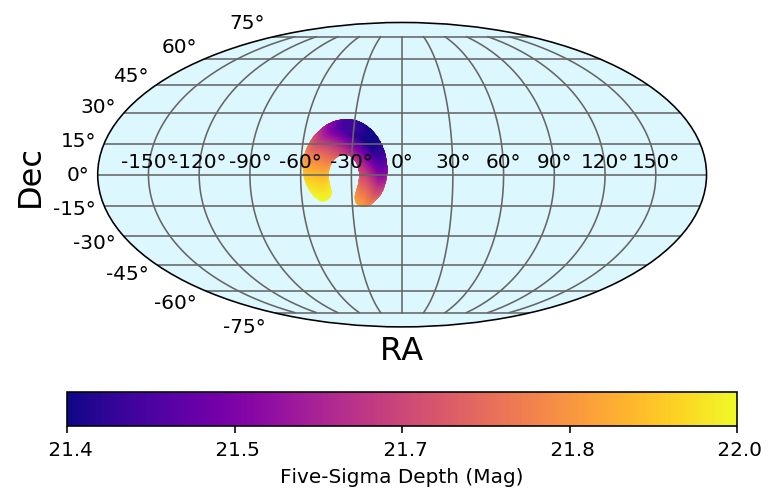

In [19]:
smap_bns_2det_event1 = np.load('bns_2det_event1.npy')
getSeeingFig('y',smap_bns_2det_event1,62502.25)
getSkyBrightFig('y',smap_bns_2det_event1,62502.25)
getM5Fig('y',smap_bns_2det_event1,62502.25)